# Stacking Model 

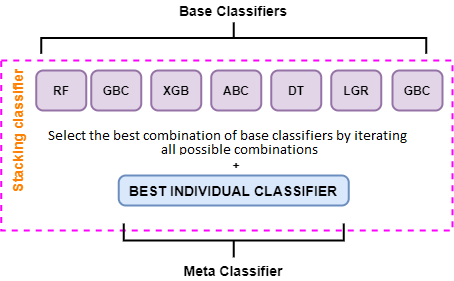

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from mlxtend.classifier import StackingClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

df = pd.read_csv('n_7.csv')
X = df.drop('class', axis=1)
encode = preprocessing.LabelEncoder()
y_str2= df['class'].values
encode.fit(y_str2)
y = encode.transform(y_str2)
X= X.drop(['punnyCode','havingIP', 'doubleSlashRedirecting','port','Https_token','similar_keyword_count','similar_brand_count','path_length','=','splitted_word_count','longest_word_length','compound_word_count','std_word_length','negligible_word_count','urlLength','char_repeat','random_domain','shorteningService','brand_name_count','target_brand_count'], axis=1)
#X= X.drop(['domainAge','pageRank'],axis=1)
X = X.to_numpy()

X_train,X_test_mid,y_train,y_test_mid = train_test_split(X, y, test_size = .2 , random_state = 1)
x_test,x_val,y_test,y_val =train_test_split(X_test_mid, y_test_mid, test_size = .5, random_state = 1)

KNN = KNeighborsClassifier(algorithm='brute', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')
RF = RandomForestClassifier(criterion='entropy',random_state=1)
DT = DecisionTreeClassifier(criterion='entropy', random_state=1)
XGB = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
GBC = GradientBoostingClassifier(n_estimators = 400, max_depth =9, learning_rate =0.4)
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.3,
                   n_estimators=100)
LGR = LogisticRegression(C=1.623776739188721, max_iter = 100, penalty = 'l1', solver = 'liblinear')


classifier_labels = ["XGB", "abc","KNN","DT","RF","LGR","GBC"]

classifiers = {"XGB": XGB,
               "abc": abc,
               "KNN":KNN,
               "DT":DT,
               "RF":RF,
               "LGR":LGR,
               "GBC":GBC
               }


combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)
print(combo_classifiers)



for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
    classifier_combo = []
    for ii in range(len(labels)):
        
        label = combo[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
    
    
    #print(classifier_combo)
    sclf = StackingClassifier(classifiers = classifier_combo, 
                         meta_classifier=GBC)
    scores = cross_val_score(sclf, X, y, cv=2, scoring='accuracy').mean()
    print(combo ,scores )

[('XGB', 'abc'), ('XGB', 'KNN'), ('XGB', 'DT'), ('XGB', 'RF'), ('XGB', 'LGR'), ('XGB', 'GBC'), ('abc', 'KNN'), ('abc', 'DT'), ('abc', 'RF'), ('abc', 'LGR'), ('abc', 'GBC'), ('KNN', 'DT'), ('KNN', 'RF'), ('KNN', 'LGR'), ('KNN', 'GBC'), ('DT', 'RF'), ('DT', 'LGR'), ('DT', 'GBC'), ('RF', 'LGR'), ('RF', 'GBC'), ('LGR', 'GBC'), ('XGB', 'abc', 'KNN'), ('XGB', 'abc', 'DT'), ('XGB', 'abc', 'RF'), ('XGB', 'abc', 'LGR'), ('XGB', 'abc', 'GBC'), ('XGB', 'KNN', 'DT'), ('XGB', 'KNN', 'RF'), ('XGB', 'KNN', 'LGR'), ('XGB', 'KNN', 'GBC'), ('XGB', 'DT', 'RF'), ('XGB', 'DT', 'LGR'), ('XGB', 'DT', 'GBC'), ('XGB', 'RF', 'LGR'), ('XGB', 'RF', 'GBC'), ('XGB', 'LGR', 'GBC'), ('abc', 'KNN', 'DT'), ('abc', 'KNN', 'RF'), ('abc', 'KNN', 'LGR'), ('abc', 'KNN', 'GBC'), ('abc', 'DT', 'RF'), ('abc', 'DT', 'LGR'), ('abc', 'DT', 'GBC'), ('abc', 'RF', 'LGR'), ('abc', 'RF', 'GBC'), ('abc', 'LGR', 'GBC'), ('KNN', 'DT', 'RF'), ('KNN', 'DT', 'LGR'), ('KNN', 'DT', 'GBC'), ('KNN', 'RF', 'LGR'), ('KNN', 'RF', 'GBC'), ('KNN', '

('XGB', 'abc', 'KNN', 'RF', 'LGR', 'GBC') 0.9593611890311637
('XGB', 'abc', 'DT', 'RF', 'LGR', 'GBC') 0.9614406308303001
('XGB', 'KNN', 'DT', 'RF', 'LGR', 'GBC') 0.9516819555150406
('abc', 'KNN', 'DT', 'RF', 'LGR', 'GBC') 0.9473324810215862
('XGB', 'abc', 'KNN', 'DT', 'RF', 'LGR', 'GBC') 0.9431327327397021
